In [1]:
import geopandas as gpd
import json

In [2]:
df = gpd.read_file('./ZonasArqueologicas/SITIOS_ARQUEOLOGICOS.shp', crs='EPSG:3857')
#df = df.set_crs(epsg = "4326", inplace = True)
#df = df.to_crs(crs=4326) 
df

,geometry
0,POINT (4616228.128 1992329.102)
1,POINT (4661107.116 2309234.730)
2,POINT (4550064.086 2009573.923)
3,POINT (4700153.336 2058566.614)
4,POINT (4992025.134 2308416.590)
...,...
16995,POINT (4942265.257 2628030.017)
16996,POINT (4548672.900 1777996.416)
16997,POINT (5007093.585 2371237.268)
16998,POINT (4649794.609 2000263.567)


<AxesSubplot:>

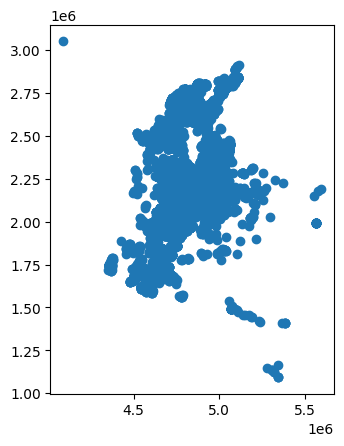

In [3]:
df.plot()

In [4]:
df1 = gpd.read_file('./ZonasArqueologicas/areas_arqueologicas.shp')
#df1 = df.to_crs(crs=4326)
df1 = df1.explode()
df1 = df1.reset_index()
df1 = df1.drop(["level_0", "level_1"], axis=1)
df1

/home/alejandro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/alejandro/anaconda3/lib/python3.7/site-packages/geopandas/geoseries.py:924: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if s.type.startswith("Multi") or s.type == "GeometryCollection":


,geometry
0,"POLYGON ((-76.03403 2.57616, -76.03402 2.57613..."
1,"POLYGON ((-76.04024 2.58155, -76.04028 2.58162..."
2,"POLYGON ((-76.04504 2.57647, -76.04585 2.57781..."
3,"POLYGON ((-72.92522 5.71025, -72.92485 5.71017..."
4,"POLYGON ((-76.29670 1.88923, -76.29652 1.88930..."
...,...
136,"POLYGON ((-77.03720 8.20412, -77.03920 8.20267..."
137,"POLYGON ((-72.67232 2.45911, -72.67265 2.45968..."
138,"POLYGON ((-72.68543 2.49921, -72.68519 2.49810..."
139,"POLYGON ((-72.67107 2.46388, -72.67008 2.46358..."


<AxesSubplot:>

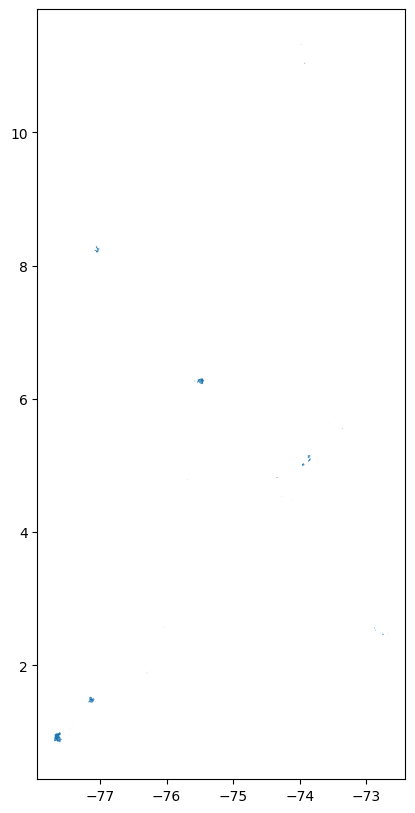

In [5]:
df1.plot(figsize=(20,10))

In [6]:
datajson = []
for i in range(0,len(df1)):
    
    try:
    
        area = df1["geometry"][i].exterior.coords

        arr = []

        for j in range(0,len(area)):
            arr.append(area[j][1])
            arr.append(area[j][0])
            arr.append(0)

        datajson.append(arr)
        
    except:
        print("error ",df1["geometry"][i])

In [7]:
save_file3 = open("ZonasArqueologicas.json", "w") 
json.dump(datajson, save_file3, indent = 6) 
save_file3.close() 